# Antigua: Exploring the Surge in Tourism Numbers

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [2]:
# Get data
tab = pd.read_html('https://statistics.gov.ag/subjects/travel-and-tourism/annual-visitor-arrivals-country/')

In [3]:
df = tab[0]

In [4]:
df.shape

(24, 20)

In [5]:
# Have a look at the table
df

,Country of Origin,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Total,253679,261802.0,265844.0,234410.0,229943.0,241331.0,246926.0,243219.0,249316.0,250450.0,265187.0,247320.0,268949.0,300990.0,125083.0,169469.0,265119.0,281896.0,330281.0
1,Europe,106687,115454.0,110266.0,93442.0,88945.0,92097.0,89909.0,88337.0,91277.0,96250.0,95956.0,90414.0,88690.0,98192.0,38685.0,52645.0,90010.0,79939.0,84274.0
2,of which: UK,89564,96801.0,89514.0,73251.0,66623.0,69184.0,68677.0,68854.0,71193.0,77890.0,76512.0,75650.0,70607.0,76837.0,31765.0,48328.0,79900.0,68278.0,70848.0
3,of which: Italy,5994,6147.0,7212.0,7726.0,10180.0,11048.0,9041.0,7942.0,7976.0,7032.0,8600.0,8613.0,6832.0,9735.0,2249.0,598.0,2343.0,2584.0,3058.0
4,of which: Germany,3025,3480.0,3597.0,3752.0,3339.0,2899.0,2768.0,2443.0,2665.0,2505.0,2165.0,2128.0,2216.0,2125.0,718.0,377.0,776.0,1061.0,1347.0
5,of which: France,1382,1841.0,1710.0,1567.0,1661.0,1747.0,1783.0,1732.0,2166.0,1829.0,1632.0,2128.0,1225.0,1722.0,758.0,636.0,1311.0,1295.0,1450.0
6,of which: Ireland,1548,1947.0,1949.0,1368.0,1050.0,985.0,920.0,853.0,868.0,799.0,781.0,817.0,881.0,899.0,418.0,493.0,1102.0,1170.0,1032.0
7,of which: Switzerland,923,798.0,1021.0,968.0,971.0,1104.0,1114.0,1155.0,1134.0,1115.0,1156.0,1120.0,1019.0,1142.0,481.0,261.0,769.0,972.0,1066.0
8,USA,73497,78698.0,84032.0,82068.0,81598.0,84832.0,93214.0,88619.0,95332.0,94617.0,108652.0,96347.0,104103.0,123553.0,60319.0,102495.0,129521.0,137157.0,173183.0
9,Canada,10053,10489.0,13189.0,12947.0,17818.0,22403.0,24185.0,30235.0,27701.0,23270.0,21196.0,22932.0,38087.0,37225.0,15716.0,4055.0,17611.0,28775.0,30912.0


In [6]:
# Set the index of the table
df.set_index('Country of Origin',inplace = True)

In [7]:
# Look at the index of countries
df.index

Index(['Total', 'Europe', 'of which: UK', 'of which: Italy',
       'of which: Germany', 'of which: France', 'of which: Ireland',
       'of which: Switzerland', 'USA', 'Canada', 'All Caribbean', 'CARICOM',
       'of which: OECS', 'Other Caribbean', 'of which: French West Indies',
       'of which: Dutch Caribbean', 'of which: Cuba', 'South America',
       'Central America', 'Other Visitors', 'Not Stated', '- : zero',
       'Source: Ministry of Tourism, NSO', 'Date: 17 February 2025'],
      dtype='object', name='Country of Origin')

In [8]:
# Drop rows at the bottom we dont want and some others
drop_rows = ['- : zero','Source: Ministry of Tourism, NSO', 'Date: 17 February 2025','CARICOM','of which: OECS',
            'Other Caribbean','of which: French West Indies','of which: Dutch Caribbean','of which: Cuba']
df = df[~df.index.isin(drop_rows)]

In [9]:
# Rename some of the index
df = df.rename(index={'of which: UK': 'UK','of which: Italy':'Italy','of which: Germany':'Germany',
                     'of which: France':'France','of which: Ireland':'Ireland','of which: Switzerland':'Switzerland',
                     'All Caribbean':'Caribbean',})

df.index

Index(['Total', 'Europe', 'UK', 'Italy', 'Germany', 'France', 'Ireland',
       'Switzerland', 'USA', 'Canada', 'Caribbean', 'South America',
       'Central America', 'Other Visitors', 'Not Stated'],
      dtype='object', name='Country of Origin')

In [10]:
df.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Country of Origin,,,,,,,,,,,,,,,,,,,
Total,253679,261802.0,265844.0,234410.0,229943.0,241331.0,246926.0,243219.0,249316.0,250450.0,265187.0,247320.0,268949.0,300990.0,125083.0,169469.0,265119.0,281896.0,330281.0
Europe,106687,115454.0,110266.0,93442.0,88945.0,92097.0,89909.0,88337.0,91277.0,96250.0,95956.0,90414.0,88690.0,98192.0,38685.0,52645.0,90010.0,79939.0,84274.0
UK,89564,96801.0,89514.0,73251.0,66623.0,69184.0,68677.0,68854.0,71193.0,77890.0,76512.0,75650.0,70607.0,76837.0,31765.0,48328.0,79900.0,68278.0,70848.0
Italy,5994,6147.0,7212.0,7726.0,10180.0,11048.0,9041.0,7942.0,7976.0,7032.0,8600.0,8613.0,6832.0,9735.0,2249.0,598.0,2343.0,2584.0,3058.0
Germany,3025,3480.0,3597.0,3752.0,3339.0,2899.0,2768.0,2443.0,2665.0,2505.0,2165.0,2128.0,2216.0,2125.0,718.0,377.0,776.0,1061.0,1347.0


In [11]:
# Have a look at the table info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, Total to Not Stated
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2006    15 non-null     object 
 1   2007    15 non-null     float64
 2   2008    15 non-null     float64
 3   2009    15 non-null     float64
 4   2010    15 non-null     float64
 5   2011    15 non-null     float64
 6   2012    15 non-null     float64
 7   2013    15 non-null     float64
 8   2014    15 non-null     float64
 9   2015    15 non-null     float64
 10  2016    15 non-null     float64
 11  2017    15 non-null     float64
 12  2018    15 non-null     float64
 13  2019    15 non-null     float64
 14  2020    15 non-null     float64
 15  2021    15 non-null     float64
 16  2022    15 non-null     float64
 17  2023    15 non-null     float64
 18  2024    15 non-null     float64
dtypes: float64(18), object(1)
memory usage: 2.3+ KB


We have the 2006 column shown as an object which suggests there might be a string in that column

In [12]:
# Check the unique values
df['2006'].unique()

array(['253679', '106687', '89564', '5994', '3025', '1382', '1548', '923',
       '73497', '10053', '59004', '1009', '419', '3010', '-'],
      dtype=object)

In [13]:
# Set the dash value to a zero
df['2006'].replace('-',0, inplace = True)

In [14]:
# Set 2006 to float 
df['2006'] = df['2006'].astype('float')

The total of Europe, USA, Canada, Caribbean, South America, Central America, Other Visitors and Not Stated equals to the Total. However, we have some European countries listed that do not sum to the total for Europe. As European countries are clearly separated out and not just lumped into a region total, due to the importance of those visitors from the start of the table, we need to add in another row to cover 'Other Europe' to balance to the total for Europe.

In [15]:
# Transpose the table for ease
df_transposed = df.T

# Get a sum for all the European countries then subtract from the total Europe to get the Other Europe
df_transposed['Europe_Sum'] = df_transposed['UK'] + df_transposed['Italy'] + df_transposed['Germany'] + \
df_transposed['France']+ df_transposed['Ireland'] + df_transposed['Switzerland']
df_transposed['Other_Europe'] = df_transposed['Europe'] - df_transposed['Europe_Sum']

# Delect columns we don't want
df_transposed.drop(columns = ['Europe','Europe_Sum'],axis = 1, inplace = True)

df_transposed

Country of Origin,Total,UK,Italy,Germany,France,Ireland,Switzerland,USA,Canada,Caribbean,South America,Central America,Other Visitors,Not Stated,Other_Europe
2006,253679.0,89564.0,5994.0,3025.0,1382.0,1548.0,923.0,73497.0,10053.0,59004.0,1009.0,419.0,3010.0,0.0,4251.0
2007,261802.0,96801.0,6147.0,3480.0,1841.0,1947.0,798.0,78698.0,10489.0,50323.0,932.0,381.0,5524.0,1.0,4440.0
2008,265844.0,89514.0,7212.0,3597.0,1710.0,1949.0,1021.0,84032.0,13189.0,52954.0,1194.0,416.0,3756.0,37.0,5263.0
2009,234410.0,73251.0,7726.0,3752.0,1567.0,1368.0,968.0,82068.0,12947.0,41546.0,1440.0,488.0,2452.0,27.0,4810.0
2010,229943.0,66623.0,10180.0,3339.0,1661.0,1050.0,971.0,81598.0,17818.0,37505.0,1201.0,316.0,2522.0,38.0,5121.0
2011,241331.0,69184.0,11048.0,2899.0,1747.0,985.0,1104.0,84832.0,22403.0,37887.0,1082.0,434.0,2563.0,33.0,5130.0
2012,246926.0,68677.0,9041.0,2768.0,1783.0,920.0,1114.0,93214.0,24185.0,35249.0,1177.0,472.0,2624.0,96.0,5606.0
2013,243219.0,68854.0,7942.0,2443.0,1732.0,853.0,1155.0,88619.0,30235.0,31645.0,1201.0,345.0,2775.0,62.0,5358.0
2014,249316.0,71193.0,7976.0,2665.0,2166.0,868.0,1134.0,95332.0,27701.0,30282.0,1156.0,383.0,3128.0,57.0,5275.0
2015,250450.0,77890.0,7032.0,2505.0,1829.0,799.0,1115.0,94617.0,23270.0,30460.0,2084.0,461.0,3263.0,45.0,5080.0


In [16]:
y = [int(i) for i in df_transposed.index]

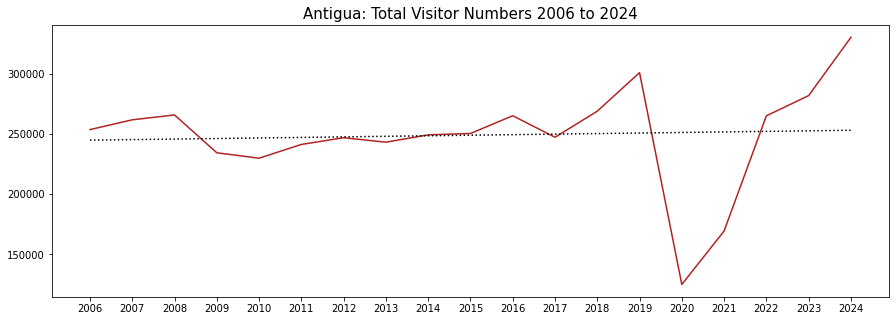

In [17]:
# Pattern of total visitors over the period
X = np.arange(2006,2025)
z = np.polyfit(X,df_transposed['Total'],1)
p = np.poly1d(z)

fig, ax = plt.subplots(figsize = (15,5))
plt.plot(df_transposed['Total'], color = 'firebrick')
plt.plot(df_transposed.index,p(X),"black",linestyle = ":")
plt.title('Antigua: Total Visitor Numbers 2006 to 2024', fontsize = 15);

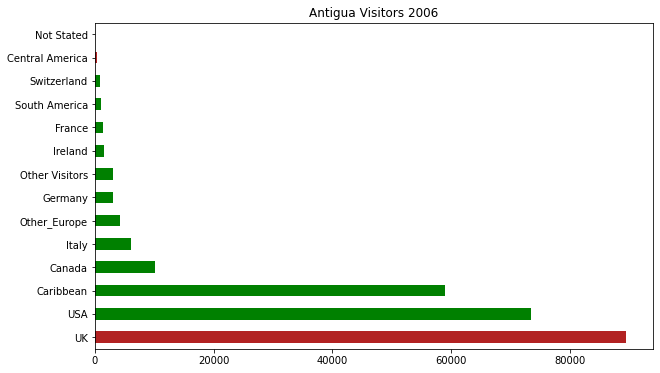

In [18]:
# Where did most of the visitors come from at the start of the period?

colors = ['firebrick', 'green', 'green', 'green','green','green','green','green','green','green','green','green']  

df_transposed.loc['2006'][1:].sort_values(ascending = False).plot(kind = 'barh',
                                                                 color = colors,
                                                                 figsize = (10,6),
                                                                 title = 'Antigua Visitors 2006',
                                                                 xlabel = "",
                                                                 );

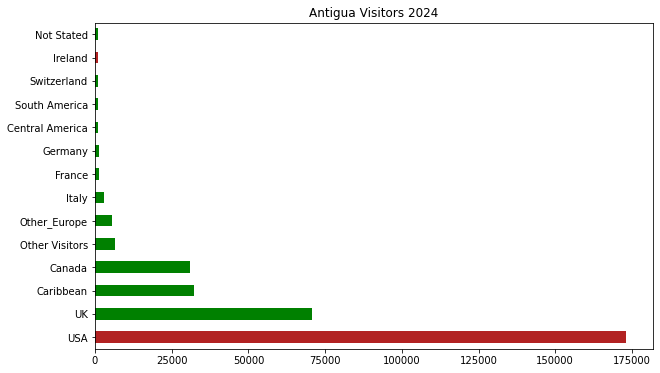

In [19]:
# Where did most of the visitors come from at the start of the period?

df_transposed.loc['2024'][1:].sort_values(ascending = False).plot(kind = 'barh',
                                                                 color = colors,
                                                                 figsize = (10,6),
                                                                  xlabel = "",
                                                                 title = 'Antigua Visitors 2024');

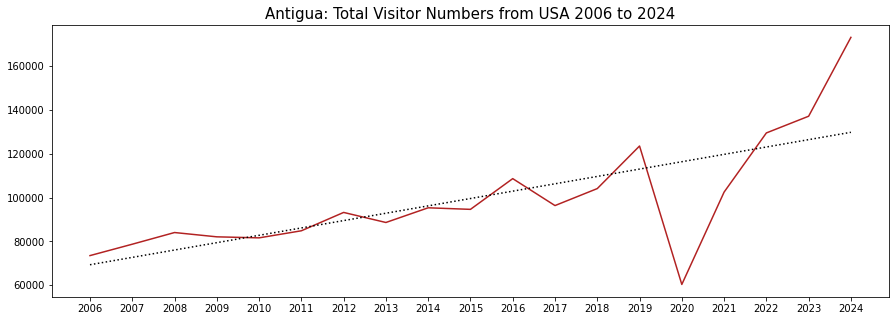

In [20]:
# Pattern of total visitors over the period
z = np.polyfit(X,df_transposed['USA'],1)
p = np.poly1d(z)

fig, ax = plt.subplots(figsize = (15,5))
plt.plot(df_transposed['USA'], color = 'firebrick')
plt.plot(df_transposed.index,p(X),"black",linestyle = ":")

plt.title('Antigua: Total Visitor Numbers from USA 2006 to 2024', fontsize = 15);

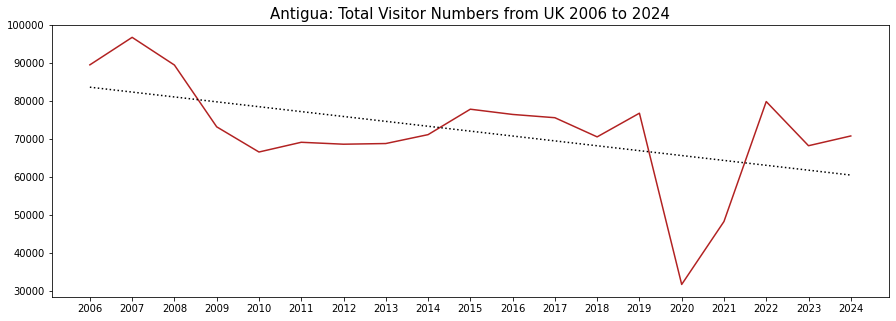

In [21]:
# Pattern of total visitors over the period
z = np.polyfit(X,df_transposed['UK'],1)
p = np.poly1d(z)

fig, ax = plt.subplots(figsize = (15,5))
plt.plot(df_transposed['UK'], color = 'firebrick')
plt.title('Antigua: Total Visitor Numbers from UK 2006 to 2024', fontsize = 15)
plt.plot(df_transposed.index,p(X),"black",linestyle = ":");

We can see that the trend in total visitors over the period is gently upwards, although visitor numbers fell sharply in 2020 and 2021 due to the worldwide CoVid 19 lockdowns. We can also see that the numbers of visitors from the USA has risen considerably from that point onwards. In 2006 most visitors were from the UK but by 2024, this was replaced by the USA. If we look at the USA and UK separately, the trend for the former is clearly upwards and from the latter it is downwards. USA visitors have become an increasingly important part of the tourist industry for Antigua. We can also see from the bar charts of 2006 and 2024, that visitors from other caribbean islands have fallen in number.

In [22]:
# Bring in monthly data
tab2 = pd.read_html('https://statistics.gov.ag/monthly-visitor-arrivals-by-country/')

In [23]:
df_month = tab2[0]

In [24]:
# Check first few rows
df_month.head()

,Unnamed: 0,Jan-06,Feb-06,Mar-06,Apr-06,May-06,Jun-06,Jul-06,Aug-06,Sep-06,...,Apr-24,May-24,Jun-24,Jul-24,Aug-24,Sep-24,Oct-24,Nov-24,Dec-24,Jan-24.1
0,Total visitors,22941,24815,26410,25523,19698,17779,22764,20757,12893,...,28802.0,24913,25604.0,28349.0,24267.0,12993,20198,29231,38584.0,34313.0
1,Europe,10170,11270,11287,10071,8312,6239,7871,7982,5052,...,7625.0,5566,4093.0,4814.0,4429.0,3174,6195,8937,11030.0,10097.0
2,of which: UK,8272,9378,9438,7963,7316,5339,6840,6268,4531,...,6403.0,4591,3553.0,4082.0,3780.0,2854,5631,7579,8851.0,8346.0
3,USA,7389,7870,8903,7925,5795,5714,6448,4708,3338,...,15474.0,13994,16084.0,17460.0,14268.0,6356,9341,13718,20484.0,16974.0
4,Canada,1527,1572,1510,1136,510,305,471,390,328,...,2739.0,1121,973.0,1532.0,1267.0,763,1442,3468,3312.0,3935.0


In [25]:
df_month.tail()

,Unnamed: 0,Jan-06,Feb-06,Mar-06,Apr-06,May-06,Jun-06,Jul-06,Aug-06,Sep-06,...,Apr-24,May-24,Jun-24,Jul-24,Aug-24,Sep-24,Oct-24,Nov-24,Dec-24,Jan-24.1
14,Other Visitors,290,280,252,283,390,146,244,210,148,...,398.0,817,1305.0,376.0,523.0,248,302,467,547.0,555.0
15,Not Stated,-,-,-,-,-,-,-,-,-,...,1.0,-,250.0,552.0,76.0,-,-,-,1.0,2.0
16,- : zero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,"Source: Min of Tourism, NSO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Date: 10 March 2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Rename the first column
df_month.rename(columns = {'Unnamed: 0':'Country of Origin'},inplace = True)

In [27]:
# Run through the cleaning as before

# Set the index of the table
df_month.set_index('Country of Origin',inplace = True)

# Drop rows at the bottom we dont want and some others
drop_rows = ['- : zero','Source: Min of Tourism, NSO', 'Date: 10 March 2025','CARICOM','of which: OECS',
            'Other Caribbean','of which: French West Indies','of which: Dutch Caribbean','of which: Cuba']

df_month = df_month[~df_month.index.isin(drop_rows)]

# Rename some of the index
df_month = df_month.rename(index={'of which: UK': 'UK','All Caribbean':'Caribbean',})


In [28]:
# Set the dash value to a zero
df_month.replace('-',0, inplace = True)

In [29]:
# Transpose the table for ease
df_month_trans = df_month.T
df_month_trans

Country of Origin,Total visitors,Europe,UK,USA,Canada,Caribbean,South America,Central America,Other Visitors,Not Stated
Jan-06,22941,10170,8272,7389,1527,3460,70,35,290,0
Feb-06,24815,11270,9378,7870,1572,3684,99,40,280,0
Mar-06,26410,11287,9438,8903,1510,4339,76,43,252,0
Apr-06,25523,10071,7963,7925,1136,5957,114,37,283,0
May-06,19698,8312,7316,5795,510,4549,92,50,390,0
...,...,...,...,...,...,...,...,...,...,...
Sep-24,12993,3174,2854,6356,763,2329,52,71,248,0
Oct-24,20198,6195,5631,9341,1442,2774,77,67,302,0
Nov-24,29231,8937,7579,13718,3468,2508,79,54,467,0
Dec-24,38584.0,11030.0,8851.0,20484.0,3312.0,3050.0,94.0,66.0,547.0,1.0


In [30]:
df_month_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, Jan-06 to Jan-24.1
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Total visitors   229 non-null    object
 1   Europe           229 non-null    object
 2   UK               229 non-null    object
 3   USA              229 non-null    object
 4   Canada           229 non-null    object
 5   Caribbean        229 non-null    object
 6   South America    229 non-null    object
 7   Central America  229 non-null    object
 8   Other Visitors   229 non-null    object
 9   Not Stated       229 non-null    object
dtypes: object(10)
memory usage: 19.7+ KB


In [31]:
# We have integers and floats, we need to fix to a float
df_month_trans = df_month_trans.apply(pd.to_numeric, errors='coerce')

In [32]:
# Get Other Europe
df_month_trans['Other_Europe'] = df_month_trans['Europe'] - df_month_trans['UK']

# Delect columns we don't want
df_month_trans.drop(columns = ['Europe'],axis = 1, inplace = True)

df_month_trans

Country of Origin,Total visitors,UK,USA,Canada,Caribbean,South America,Central America,Other Visitors,Not Stated,Other_Europe
Jan-06,22941.0,8272.0,7389.0,1527.0,3460.0,70.0,35.0,290.0,0.0,1898.0
Feb-06,24815.0,9378.0,7870.0,1572.0,3684.0,99.0,40.0,280.0,0.0,1892.0
Mar-06,26410.0,9438.0,8903.0,1510.0,4339.0,76.0,43.0,252.0,0.0,1849.0
Apr-06,25523.0,7963.0,7925.0,1136.0,5957.0,114.0,37.0,283.0,0.0,2108.0
May-06,19698.0,7316.0,5795.0,510.0,4549.0,92.0,50.0,390.0,0.0,996.0
...,...,...,...,...,...,...,...,...,...,...
Sep-24,12993.0,2854.0,6356.0,763.0,2329.0,52.0,71.0,248.0,0.0,320.0
Oct-24,20198.0,5631.0,9341.0,1442.0,2774.0,77.0,67.0,302.0,0.0,564.0
Nov-24,29231.0,7579.0,13718.0,3468.0,2508.0,79.0,54.0,467.0,0.0,1358.0
Dec-24,38584.0,8851.0,20484.0,3312.0,3050.0,94.0,66.0,547.0,1.0,2179.0


In [33]:
# Replace the last value in the index which should be January 2025
months = df_month_trans.index.tolist()
months[-1] = 'Jan-25'

df_month_trans.index = months

In [34]:
# Take the index column and create a new column with this, then extract months
df_month_trans['Date'] = df_month_trans.index
df_month_trans['Date'] = pd.to_datetime(df_month_trans['Date'], format='%b-%y')
df_month_trans['Month'] = df_month_trans['Date'].dt.month
df_month_trans['Month_name'] = df_month_trans['Date'].dt.month_name()

In [35]:
# Groupby month
month_vis = df_month_trans.groupby(['Month_name', 'Month'],as_index = False)['Total visitors'].mean().set_index('Month_name')
month_vis

Country of Origin,Month,Total visitors
Month_name,,
April,4,22376.421053
August,8,17918.473684
December,12,26941.473684
February,2,25238.944444
January,1,25131.950000
July,7,22249.052632
June,6,17148.263158
March,3,26153.842105
May,5,17775.578947


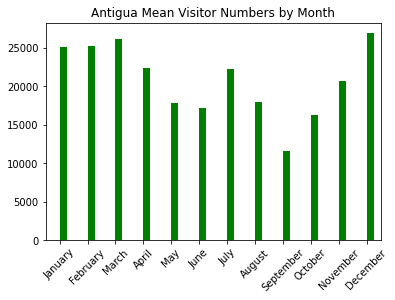

In [36]:
# Plot the average visitors by month
ax = month_vis.sort_values(by = 'Month').plot(kind = 'bar', 
                                         color = 'green', 
                                         legend = None, 
                                         xlabel = "",
                                        title = "Antigua Mean Visitor Numbers by Month",
                                        )
plt.xticks(rotation=45);

We can see that the months of November (month 11) through to March (month 3) have the highest visitor numbers with dips over the Northern Hemisphere summer

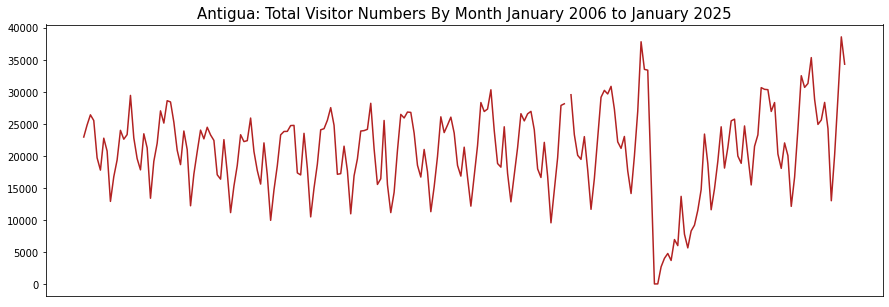

In [37]:
# Pattern of total visitors over the period
fig, ax = plt.subplots(figsize = (15,5))
plt.plot(df_month_trans['Total visitors'], color = 'firebrick')
plt.title('Antigua: Total Visitor Numbers By Month January 2006 to January 2025', fontsize = 15)
plt.xticks(visible=False)
ax.set_xticks([]);

We can see that the total visitor numbers by month has some seasonality to it, with numbers higher in the winter season when visitors come to escape northern winters. Of interest is the peak prior to the lockdown in 2020 in December 2019.

In [38]:
# Month of highest number of total visitors
df_month_trans[df_month_trans['Total visitors'] == df_month_trans['Total visitors'].max()]

Country of Origin,Total visitors,UK,USA,Canada,Caribbean,South America,Central America,Other Visitors,Not Stated,Other_Europe,Date,Month,Month_name
Dec-24,38584.0,8851.0,20484.0,3312.0,3050.0,94.0,66.0,547.0,1.0,2179.0,2024-12-01,12,December


In [39]:
# Top dates for visitors
df_month_trans.sort_values(by = 'Total visitors', ascending = False).head(5)

Country of Origin,Total visitors,UK,USA,Canada,Caribbean,South America,Central America,Other Visitors,Not Stated,Other_Europe,Date,Month,Month_name
Dec-24,38584.0,8851.0,20484.0,3312.0,3050.0,94.0,66.0,547.0,1.0,2179.0,2024-12-01,12,December
Dec-19,37818.0,9278.0,15662.0,5077.0,3874.0,134.0,68.0,668.0,13.0,3044.0,2019-12-01,12,December
Mar-24,35345.0,7756.0,17674.0,4972.0,2718.0,104.0,97.0,431.0,0.0,1593.0,2024-03-01,3,March
Jan-25,34313.0,8346.0,16974.0,3935.0,2443.0,205.0,102.0,555.0,2.0,1751.0,2025-01-01,1,January
Jan-20,33509.0,8418.0,13399.0,6006.0,2517.0,184.0,66.0,498.0,17.0,2404.0,2020-01-01,1,January


Based on the data we have, could we use this to forecast visitor numbers for the next year or two?

In [40]:
# Check for nan values
df_month_trans["Total visitors"].isna().sum()

1

In [41]:
# We have a nan value for this row. 
df_month_trans[df_month_trans["Total visitors"].isna()]

Country of Origin,Total visitors,UK,USA,Canada,Caribbean,South America,Central America,Other Visitors,Not Stated,Other_Europe,Date,Month,Month_name
Feb-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2018-02-01,2,February


In [42]:
# Look at values before and after this point
display(df_month_trans[df_month_trans.index == 'Jan-18'])
display(df_month_trans[df_month_trans.index == 'Mar-18'])

Country of Origin,Total visitors,UK,USA,Canada,Caribbean,South America,Central America,Other Visitors,Not Stated,Other_Europe,Date,Month,Month_name
Jan-18,28136.0,7639.0,9714.0,5311.0,2521.0,153.0,53.0,416.0,1.0,2328.0,2018-01-01,1,January


Country of Origin,Total visitors,UK,USA,Canada,Caribbean,South America,Central America,Other Visitors,Not Stated,Other_Europe,Date,Month,Month_name
Mar-18,29547.0,7294.0,11910.0,5235.0,2462.0,132.0,44.0,309.0,5.0,2156.0,2018-03-01,3,March


We will forward fill to replace the nan values for the total visitors column

In [43]:
# Applying forward fill
df_month_trans['Total visitors ff'] = df_month_trans['Total visitors'].ffill()

In [44]:
# Import Hodrick-Prescott filter) function for decomposing a time series into a trend and cyclical component
from statsmodels.tsa.filters.hp_filter import hpfilter

In [45]:
# Lambda value depends on frequency (129,600 for monthly data)
vis_cycle, vis_trend = hpfilter(df_month_trans["Total visitors ff"], lamb = 129600)
df_month_trans["trend"] = vis_trend
df_month_trans["cycl"] = vis_cycle
df_month_trans.head()

Country of Origin,Total visitors,UK,USA,Canada,Caribbean,South America,Central America,Other Visitors,Not Stated,Other_Europe,Date,Month,Month_name,Total visitors ff,trend,cycl
Jan-06,22941.0,8272.0,7389.0,1527.0,3460.0,70.0,35.0,290.0,0.0,1898.0,2006-01-01,1,January,22941.0,22164.029683,776.970317
Feb-06,24815.0,9378.0,7870.0,1572.0,3684.0,99.0,40.0,280.0,0.0,1892.0,2006-02-01,2,February,24815.0,22120.848536,2694.151464
Mar-06,26410.0,9438.0,8903.0,1510.0,4339.0,76.0,43.0,252.0,0.0,1849.0,2006-03-01,3,March,26410.0,22077.673383,4332.326617
Apr-06,25523.0,7963.0,7925.0,1136.0,5957.0,114.0,37.0,283.0,0.0,2108.0,2006-04-01,4,April,25523.0,22034.531010,3488.468990
May-06,19698.0,7316.0,5795.0,510.0,4549.0,92.0,50.0,390.0,0.0,996.0,2006-05-01,5,May,19698.0,21991.481626,-2293.481626


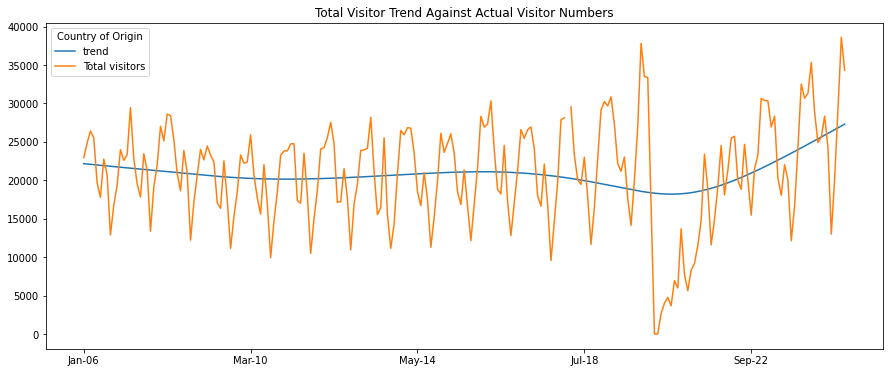

In [46]:
# Plot the series with trend
df_month_trans[["trend","Total visitors"]].plot(title = "Total Visitor Trend Against Actual Visitor Numbers", figsize = (15,6));

In [47]:
# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

In [97]:
# Select the data we are interested in
decomp = df_month_trans[['Date','Total visitors ff']]
decomp.set_index('Date',inplace = True)
decomp = decomp.rename_axis(None, axis=1)

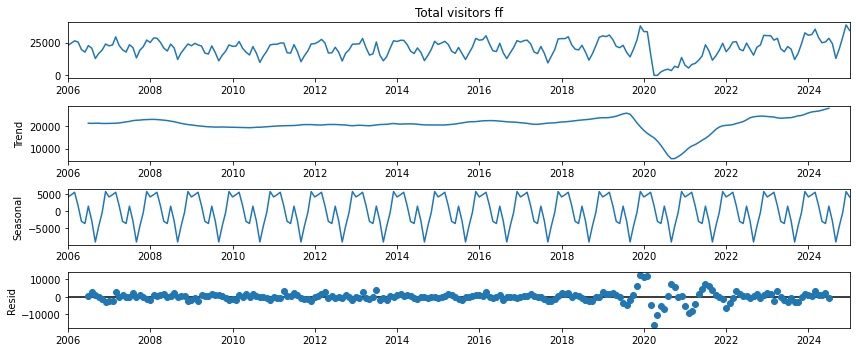

In [98]:
# Decompose the time series
results = seasonal_decompose(decomp["Total visitors ff"], model = "additive")
from pylab import rcParams
rcParams['figure.figsize'] = (12,5)
results.plot();

After decomposing the series we can see that the trend is fairly stable, with perhaps a gradual upward trend. The seasonality is also clear from the seasonal plot and seems to be increasing in variance in the last few years.

The residuals from 2020 to 2022 demonstrate much more variation around mean zero. This makes it much more difficult to forecast as we really have two different time series here, the time up to Covid and the time since. The large range between -10000 and 10000 suggests there may still be significant variability or noise not captured by the model even though the average error is centred around zero. This can indicate that the model is not fitting the data well.

Lets try the decomposition with a multiplicative model

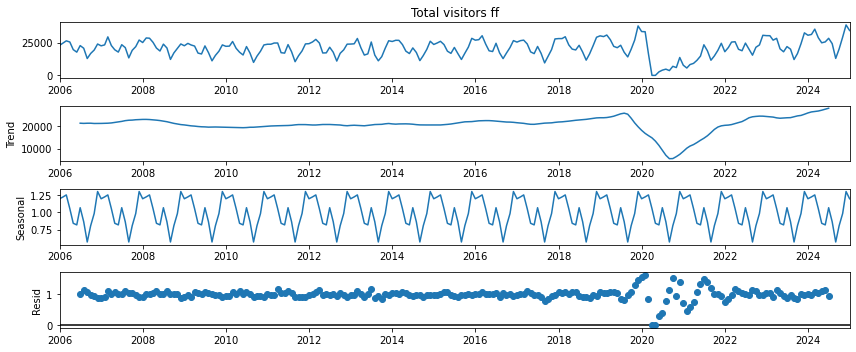

In [99]:
# Decompose the time series with multiplicative
results2 = seasonal_decompose(decomp["Total visitors ff"], model = "multiplicative")
from pylab import rcParams
rcParams['figure.figsize'] = (12,5)
results2.plot();

The residuals are oscillating towards the latter part of the series around the time of the pandemic as before but also are not around the mean zero. it suggests that the model is overestimating or underestimating the data by a multiplicative factor at this point which is unsurprising as this was a time of great uncertaintly and dramatic change. They are not capturing the actual variations in the data effectively. A residual range close to 1 also suggests that the multiplicative model may not be the best choice for this dataset, particularly if the values of the original time series are significantly larger or smaller, leading to distorted residuals.However, the differences in scale are much smaller than for the additive model, being mostly around 0 to 1 rather than -10000 and 10000.

We will try a Holt Winters model, which accounts for trend, seasonality and level and try different combinations of additive and multiplicative trend and seasonality.

In [100]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#### Additive Trend and Additive Seasonality

In [101]:
from sklearn.exceptions import ConvergenceWarning

In [102]:
# Additive trend and additive seasonality
decomp["TESAdd_12"] = ExponentialSmoothing(decomp["Total visitors ff"], trend = 'add', seasonal = 'add',seasonal_periods = 12).fit().fittedvalues

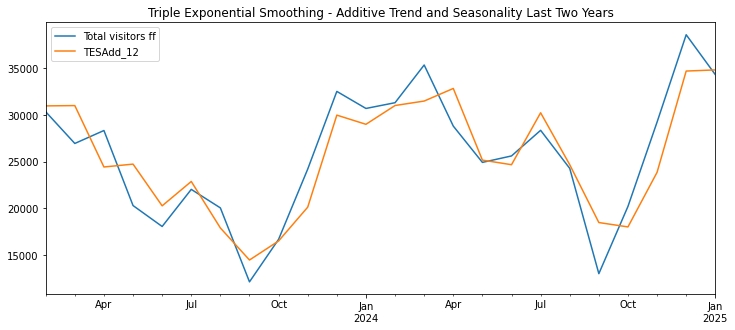

In [103]:
decomp[['Total visitors ff','TESAdd_12']].iloc[-24:].plot(title = "Triple Exponential Smoothing - Additive Trend and Seasonality Last Two Years",
                                                         xlabel = "");

#### Additive Trend and Multiplicative Seasonality

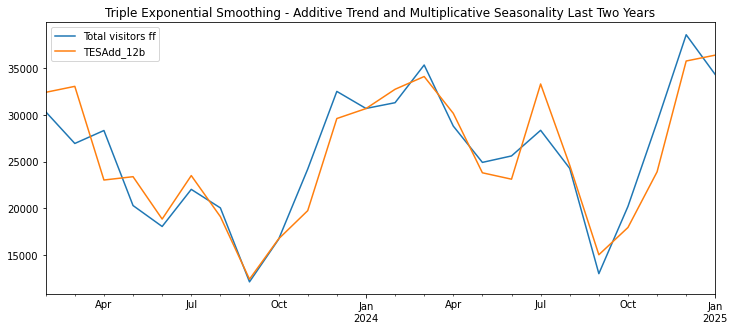

In [104]:
# Additive trend and multiplicative seasonality
decomp["TESAdd_12b"] = ExponentialSmoothing(decomp["Total visitors ff"], trend = 'add', seasonal = 'mul',seasonal_periods = 12).fit().fittedvalues
decomp[['Total visitors ff',"TESAdd_12b"]].iloc[-24:].plot(title = "Triple Exponential Smoothing - Additive Trend and Multiplicative Seasonality Last Two Years",
                                                          xlabel = "");

#### Multiplicative Trend and Additive Seasonality

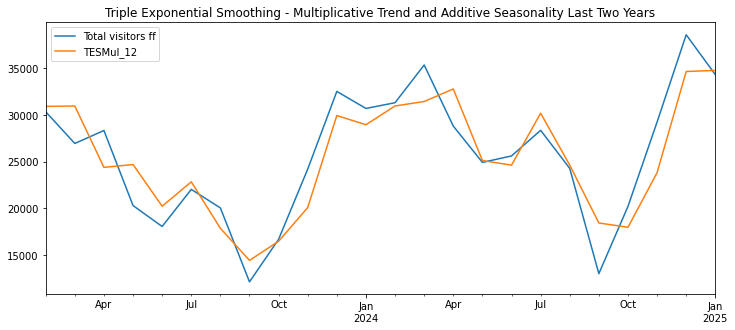

In [105]:
# Multiplicative trend and additive seasonality
decomp["TESMul_12"] = ExponentialSmoothing(decomp["Total visitors ff"], trend = 'mul', seasonal = 'add',seasonal_periods = 12).fit().fittedvalues
decomp[['Total visitors ff',"TESMul_12"]].iloc[-24:].plot(title = "Triple Exponential Smoothing - Multiplicative Trend and Additive Seasonality Last Two Years",
                                                          xlabel = "");

#### Multiplicative Trend and Multiplicative Seasonality

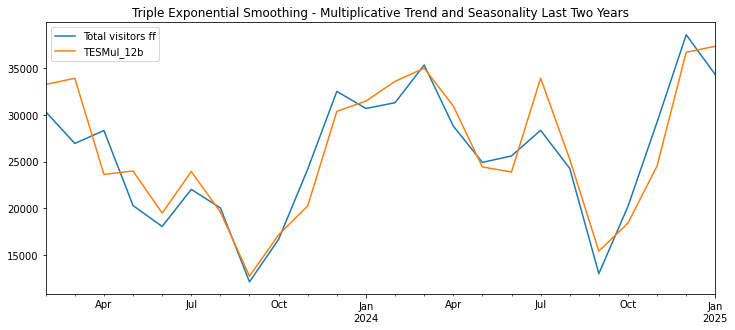

In [106]:
# Try mulitiplicative trend and seasonality
decomp["TESMul_12b"] = ExponentialSmoothing(decomp["Total visitors ff"], trend = 'mul', seasonal = 'mul',seasonal_periods = 12).fit().fittedvalues
decomp[['Total visitors ff',"TESMul_12b"]].iloc[-24:].plot(title = "Triple Exponential Smoothing - Multiplicative Trend and Seasonality Last Two Years",
                                                          xlabel = "");

In [107]:
decomp

,Total visitors ff,TESAdd_12,TESAdd_12b,TESMul_12,TESMul_12b
Date,,,,,
2006-01-01,22941.0,23330.890404,23366.798546,23330.890404,23366.798546
2006-02-01,24815.0,24582.469069,24481.353831,24582.353752,24481.203247
2006-03-01,26410.0,26929.502345,27030.360655,26929.447101,27030.322274
2006-04-01,25523.0,22558.391826,22548.654684,22558.189342,22548.446740
2006-05-01,19698.0,21246.201476,21075.389262,21246.911301,21076.079035
...,...,...,...,...,...
2024-09-01,12993.0,18469.772260,15021.115529,18424.909164,15412.915170
2024-10-01,20198.0,18001.448154,17940.777754,17962.313327,18408.251585
2024-11-01,29231.0,23851.109065,23902.268817,23809.988882,24525.081411


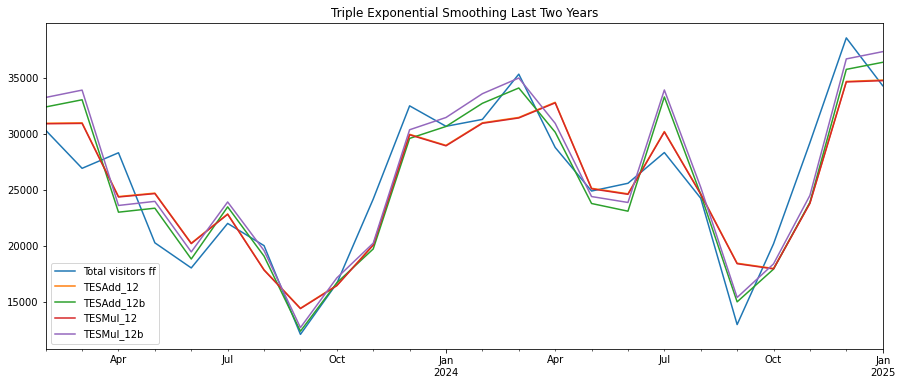

In [112]:
# Plot all on the chart
decomp[['Total visitors ff', 'TESAdd_12','TESAdd_12b', 'TESMul_12',
       'TESMul_12b']].iloc[-24:].plot(title = "Triple Exponential Smoothing Last Two Years", 
                                      figsize = (15,6),
                                     xlabel = "");

It seems as if the additive trend and additive seasonality model tracks the total visitors line well up to the time of Covid. The TESAdd_12 and TESMul_12 are virtually on top of each other as the values are very close. This suggests that the underlying data is exhibiting characteristics that do not significantly differentiate between the two models, so the choice of modeling approach may not significantly impact the results.


We can look at a metric of root mean squared error. 

#### Time series metrics 
Mean absolute error - simple but not alerting if forecast is wrong for a few points.  
Mean squared error - squared. Larger errors are highlighted.However, the units are also squared not just residuals, hard to understand.  
Root mean squared error - root of MSE. Compare the value to the average values in the particular dataset.  

In [74]:
# Get the root mean squared errors
print(np.sqrt(mean_squared_error(decomp['Total visitors ff'],decomp['TESAdd_12'])))
print(np.sqrt(mean_squared_error(decomp['Total visitors ff'],decomp['TESAdd_12b'])))
print(np.sqrt(mean_squared_error(decomp['Total visitors ff'],decomp['TESMul_12'])))
print(np.sqrt(mean_squared_error(decomp['Total visitors ff'],decomp['TESMul_12b'])))

2591.600425737135
2591.9160746854222
2593.0543623762433
2596.0608290676273


The additive model for trend and seasonality seems to fit the data the best.

#### Test Set

Split the data into training and test sets (test sets usually 20% of the sample).Test data should at least be as long as the forecast period/horizon

In [113]:
# Split into training and test sets
print('Number of observations',len(decomp['Total visitors ff']))
print('Training Set', round(len(decomp['Total visitors ff'])*0.8,0))
print('Test Set',round(len(decomp['Total visitors ff'])*0.2,0 ))

Number of observations 229
Training Set 183.0
Test Set 46.0


In [114]:
# Training and test sets
train = decomp.iloc[:183]
test = decomp.iloc[184:]

In [115]:
# Size of test set
len(test)

45

In [116]:
# Model 1 (additive trend and additive seasonality) - fit on the training data
fitted_model1 = ExponentialSmoothing(train['Total visitors ff'], trend = 'additive', 
                                    seasonal = 'additive',seasonal_periods = 12).fit()

# Forecast 4 years ahead
test_pred1 = fitted_model1.forecast(45)

In [117]:
# Model 2 (multiplicative trend and additive seasonality) - fit on the training data
fitted_model2 = ExponentialSmoothing(train['Total visitors ff'], trend = 'multiplicative', 
                                    seasonal = 'additive',seasonal_periods = 12).fit()

# Forecast 4 years ahead
test_pred2 = fitted_model2.forecast(45)

In [118]:
# Model 3 (additive trend and multiplicative seasonality) - fit on the training data
fitted_model3 = ExponentialSmoothing(train['Total visitors ff'], trend = 'additive', 
                                    seasonal = 'multiplicative',seasonal_periods = 12).fit()

# Forecast 4 years ahead
test_pred3 = fitted_model3.forecast(45)

In [119]:
# Model 4 (multiplicative trend and multiplicative seasonality) - fit on the training data
fitted_model4 = ExponentialSmoothing(train['Total visitors ff'], trend = 'multiplicative', 
                                    seasonal = 'multiplicative',seasonal_periods = 12).fit()

# Forecast 4 years ahead
test_pred4 = fitted_model4.forecast(45)

In [120]:
def metrics(test_pred):
    print("Mean Absolute Error:",mean_absolute_error(test['Total visitors ff'],test_pred))
    print("Mean Squared Error:",mean_squared_error(test['Total visitors ff'], test_pred))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(test['Total visitors ff'],test_pred)))
    print("Mean:",test["Total visitors ff"].mean())
    print("STD:", test["Total visitors ff"].std())
    

In [121]:
metrics(test_pred1)

Mean Absolute Error: 18178.9760186469
Mean Squared Error: 362425805.4172961
Root Mean Squared Error: 19037.48421975173
Mean: 23338.155555555557
STD: 6638.523315931158


In [122]:
metrics(test_pred2)

Mean Absolute Error: 18226.1308229561
Mean Squared Error: 364309537.4533691
Root Mean Squared Error: 19086.894389956924
Mean: 23338.155555555557
STD: 6638.523315931158


In [123]:
metrics(test_pred3)

Mean Absolute Error: 16167.936768501568
Mean Squared Error: 296402494.6902822
Root Mean Squared Error: 17216.343824699896
Mean: 23338.155555555557
STD: 6638.523315931158


In [124]:
metrics(test_pred4)

Mean Absolute Error: 16218.764787218124
Mean Squared Error: 298282304.18928593
Root Mean Squared Error: 17270.8512873363
Mean: 23338.155555555557
STD: 6638.523315931158


Looking at the test metrics, we can see that the third model with additive trend and multiplicative seasonality returns the lowest root mean squared error. Comparing this metric to the standard deviation gives a good idea that the model isn't great.

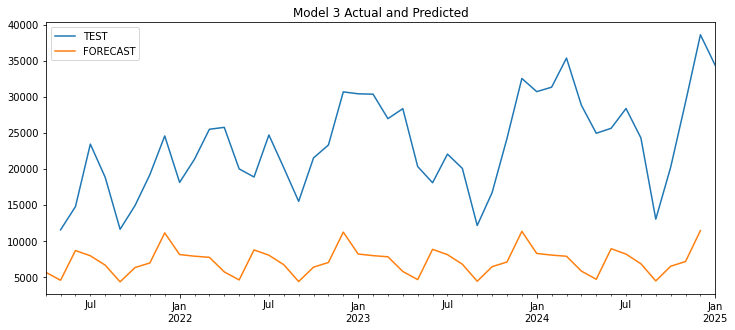

In [125]:
# Plot the test actual and test forecast
test["Total visitors ff"].plot(legend = True, label = "TEST", xlabel = "", title = "Model 3 Actual and Predicted");
test_pred3.plot(legend = True,label = "FORECAST");

Our model isn't doing very well, probably because of the large dip in 2020 from Covid. We should probably treat these as two separate models, one up to Covid and one after but we don't have much data for the post Covid period. Another method would be to impute values for this unusual period perhaps based on an average of values before and after to be more representative of typical visitor numbers. As the data shows non-stationarity (seasonality and some trend), we might also be able to apply differencing to try and smooth out this fluctuation. Stationary data has constant mean and variance over time.

In [127]:
# Calculate differenced series
first_order = diff(decomp["Total visitors ff"],k_diff = 1)
first_order.head()

Date
2006-02-01    1874.0
2006-03-01    1595.0
2006-04-01    -887.0
2006-05-01   -5825.0
2006-06-01   -1919.0
Name: Total visitors ff, dtype: float64

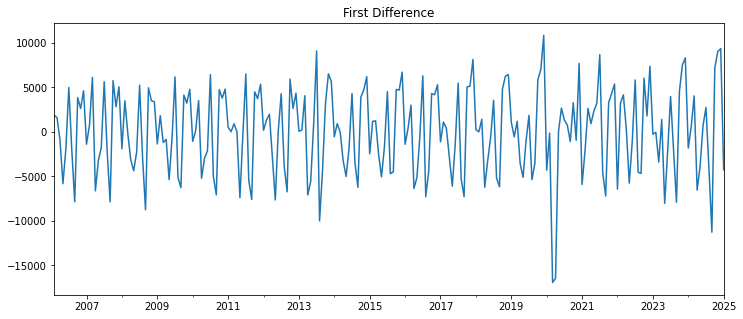

In [128]:
# Plot the differenced series
first_order.plot(title = "First Difference", xlabel = "");

Apart from the Covid year, differencing seems to have resulted in a stationary series. Lets try a Dickey-Fuller test

In [130]:
# Function to run the test
def adf_test (df):
    dftest = adfuller(df)
    df_out = pd.Series(dftest[0:4], index = ["ADF Test Statistic", "P-Value", "Number of Lags","Number of Observations"])
    for key,value in dftest[4].items():
        df_out[f'critical value({key})'] = value
        
    if df_out[1]<0.05:
        print("Reject the Null Hypothesis, the data has no unit root and is stationary")
    else:
        print("Fail to reject the Null Hypothesis, the data has a unit root and is non-stationary")
    return df_out

In [131]:
adf_test(decomp["Total visitors ff"])

Reject the Null Hypothesis, the data has no unit root and is stationary


ADF Test Statistic         -3.443020
P-Value                     0.009577
Number of Lags             12.000000
Number of Observations    216.000000
critical value(1%)         -3.460992
critical value(5%)         -2.875016
critical value(10%)        -2.573952
dtype: float64

We can use this differenced data in forecasting but we will get forecasts of the differences rather than the original values so we need to add the differences back to the original data 

In [132]:
# Training and test sets
train_stat = first_order.iloc[:183]
test_stat = first_order.iloc[182:]

In [133]:
# Look at the values
train_stat[0:5]

Date
2006-02-01    1874.0
2006-03-01    1595.0
2006-04-01    -887.0
2006-05-01   -5825.0
2006-06-01   -1919.0
Name: Total visitors ff, dtype: float64

Triple Exponential Smoothing models require the values to be positive when using multiplicative seasonality, so we will need to stick with an additive model for trend and seasonality for trying to use these differenced values

#### Differenced Data

In [134]:
# Model 1 (additive trend and additive seasonality) - fit on the training data
fitted_model_diff = ExponentialSmoothing(train_stat.values, trend = 'additive', 
                                    seasonal = 'additive',seasonal_periods = 12).fit()

# Forecast 4 years ahead
test_pred_diff = fitted_model_diff.forecast(47)

In [135]:
# Add the forecast differences back to the original series
test_original = pd.DataFrame(test['Total visitors ff'])
test_pred2_df = pd.DataFrame(test_pred2)

# Concat and create a column with the new adjusted series
revised_series = pd.concat([test_original,test_pred2], axis = 1)
revised_series['Adjusted'] = revised_series['Total visitors ff'] + revised_series[0]

revised_series.columns = ['Total visitors','Differenced Forecast','Adjusted Forecast']

revised_series.head()                  

,Total visitors,Differenced Forecast,Adjusted Forecast
2021-04-01,NaN,4167.344062,NaN
2021-05-01,11512.0,2857.483625,14369.483625
2021-06-01,14732.0,2519.539800,17251.539800
2021-07-01,23405.0,6185.855522,29590.855522
2021-08-01,18792.0,3174.380640,21966.380640


In [136]:
revised_series.tail()

,Total visitors,Differenced Forecast,Adjusted Forecast
2024-09-01,12993.0,-1671.018064,11321.981936
2024-10-01,20198.0,2043.027766,22241.027766
2024-11-01,29231.0,5881.431643,35112.431643
2024-12-01,38584.0,12925.663581,51509.663581
2025-01-01,34313.0,NaN,NaN


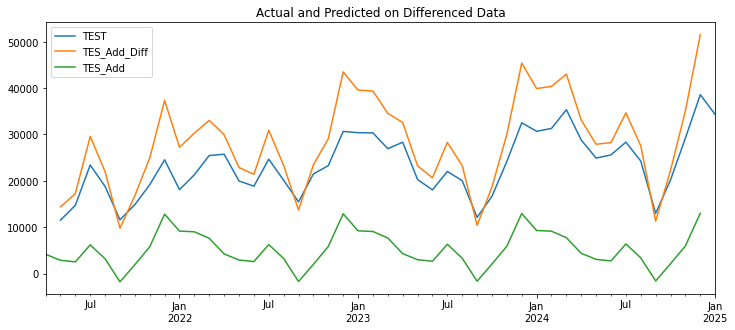

In [137]:
# Plot the test actual and test forecast
test["Total visitors ff"].plot(legend = True, label = "TEST", xlabel = "", title = 'Actual and Predicted on Differenced Data');
revised_series['Adjusted Forecast'].plot(legend = True,label = "TES_Add_Diff")
test_pred1.plot(legend = True,label = "TES_Add");

We can see that the differenced data has performed better than the previous un-differenced data series. However, the line doesn't match the actual data exactly. 

We could take the data from say the start of  when things started to get back to normal and see if we could use this instead to forecast. We have a much smaller dataset to train on but lets see what we get

#### Truncated Data

''

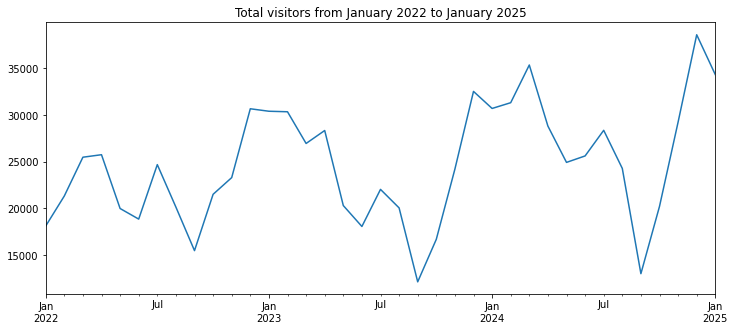

In [138]:
# Series from start of 22 (truncated)
truncated = decomp['Total visitors ff'].loc['2022-01-01':]
truncated.plot(title = 'Total visitors from January 2022 to January 2025',xlabel = "")
;

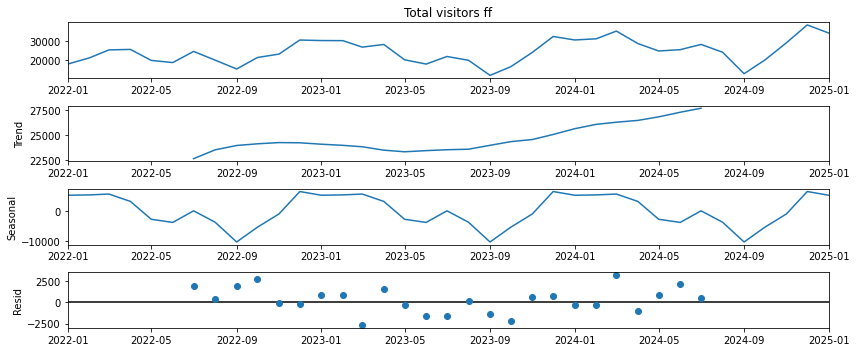

In [139]:
# Decompose the time series with additive
results3 = seasonal_decompose(truncated, model = "additive")
from pylab import rcParams
rcParams['figure.figsize'] = (12,5)
results3.plot();

In [143]:
# Create a dataframe of the truncated data
df_trunc = pd.DataFrame(truncated)

In [145]:
# Create the models with truncated data

# Additive trend and additive seasonality model on the truncated data
df_trunc["TESAdd_12Trunc"] = ExponentialSmoothing(df_trunc['Total visitors ff'], trend = 'add', seasonal = 'add',seasonal_periods = 12).fit().fittedvalues

# Multiplicative trend and additive seasonality model on the truncated data
df_trunc["TESAdd_12bTrunc"] = ExponentialSmoothing(df_trunc['Total visitors ff'], trend = 'mul', seasonal = 'add',seasonal_periods = 12).fit().fittedvalues

# Additive trend and multiplicative seasonality model on the truncated data
df_trunc["TESMul_12Trunc"] = ExponentialSmoothing(df_trunc['Total visitors ff'], trend = 'add', seasonal = 'mul',seasonal_periods = 12).fit().fittedvalues

# Multiplicative trend and multiplicative seasonality model on the truncated data
df_trunc["TESMul_12bTrunc"] = ExponentialSmoothing(df_trunc['Total visitors ff'], trend = 'mul', seasonal = 'mul',seasonal_periods = 12).fit().fittedvalues

In [146]:
# Check the RMSE of each model
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(df_trunc['Total visitors ff'],df_trunc['TESAdd_12Trunc'])))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(df_trunc['Total visitors ff'],df_trunc['TESAdd_12bTrunc'])))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(df_trunc['Total visitors ff'],df_trunc['TESMul_12Trunc'])))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(df_trunc['Total visitors ff'],df_trunc['TESMul_12bTrunc'])))

Root Mean Squared Error: 2810.7934388124827
Root Mean Squared Error: 2813.2390072087364
Root Mean Squared Error: 2715.75017436649
Root Mean Squared Error: 2717.5404027187296


The root mean squares are fairly similar for each model but the lowest metric is for model 3 on the truncated data, which is a additive trend and a multiplicative seasonality.

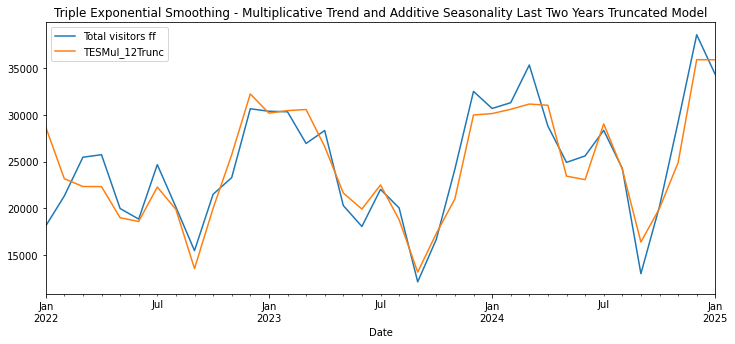

In [147]:
# Plot this
df_trunc[['Total visitors ff','TESMul_12Trunc']].plot(title = "Triple Exponential Smoothing - Multiplicative Trend and Additive Seasonality Last Two Years Truncated Model");

By just taking the data excluding the Covid period, we get a better fit. It seems that the additive trend and multiplicative seasonality is slightly better than the additive trend and seasonality model particularly towards the end of the series

In [148]:
# Length of data
len(truncated)

37

In [149]:
# Training and test sets on the truncated dataset
train = truncated.iloc[:31]
test = truncated.iloc[31:]

In [150]:
# Model 1 (multiplicative trend and additive seasonality) - fit on the training data
fitted_modeltrunc = ExponentialSmoothing(train, trend = 'multiplicative', 
                                    seasonal = 'additive',seasonal_periods = 12).fit()

# Forecast 
test_predtrunc = fitted_modeltrunc.forecast(6)

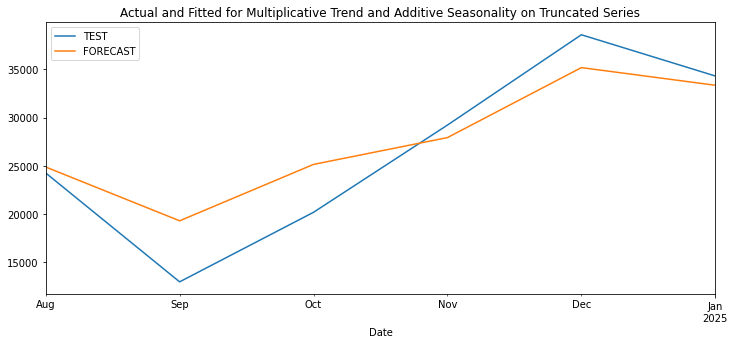

In [151]:
# Plot the test actual and test forecast
test.plot(legend = True, label = "TEST", title = 'Actual and Fitted for Multiplicative Trend and Additive Seasonality on Truncated Series');
test_predtrunc.plot(legend = True,label = "FORECAST");

In [154]:
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(test,test_predtrunc)))

Root Mean Squared Error: 3631.6729534458673


Lets forecast ahead on the basis of this model

In [155]:
# Fit the triple exponential smoothing model
finalmodel = ExponentialSmoothing(truncated, trend = 'multiplicative', 
                                    seasonal = 'additive',seasonal_periods = 12).fit()

# Forecast the next 12 months
forecast_periods = 12
forecast = finalmodel.forecast(forecast_periods)

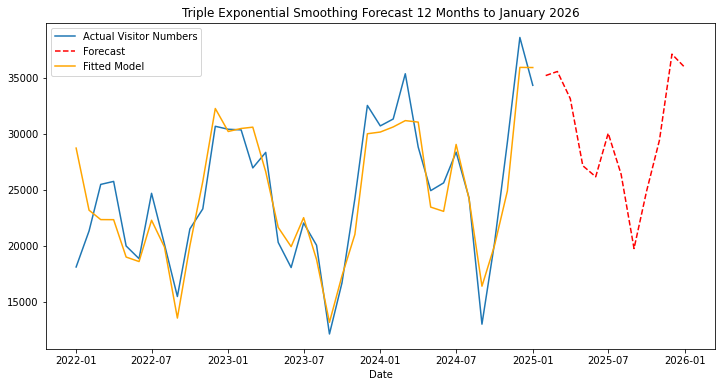

In [157]:
# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(truncated, label='Actual Visitor Numbers')
plt.plot(forecast, label='Forecast', color='red',linestyle='--')
plt.plot(df_trunc['TESMul_12Trunc'], label = 'Fitted Model', color = 'orange')
plt.title('Triple Exponential Smoothing Forecast 12 Months to January 2026')
plt.xlabel('Date')
plt.ylabel('')
plt.legend()
plt.show()

We can observe that although numbers did drop drammatically over Covid as they did for many other tourist destinations, that the tourist industry did recover and Antigua seems to be more popular than ever, particularly with visitors from the USA.

There is a lot more we can do here, trying other models such as Seasonal Arima, or maybe even a machine learning model but this short analysis piece, we are fairly confident that the trend for visitor numbers for Antigua is upwards (assuming we don't have anymore events such as global pandemics) and that we have captured seasonality in the forecast. 

The model is conservative in projecting the number of visitors in the high season and numbers could be higher than forecast, given the trend of the preiouvs two years. However, looking at the dips in low season, our forecast appears optimistic compared to the previous years, with the forecast fall at that time of year not projected to be as low even accounting for the upward trend. It would be wise to be cautious as there might be other factors at play here, such that even whilst the high season numbers are trending upwards, the comparitively unpopular low season means that visitor numbers at that time remain stubbornly low since Covid. This might reflect a change in the type of visitor towards those who want to travel there for winter sun rather than taking advantage of the peace and quiet of the island during the low season of summer in the Northern Hemisphere.